# 맷플롯립의 고급 기능 익히기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시작하기 전에

이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 컴퓨터에 나눔 폰트가 없다면 설치해 주세요.

__주의: 코랩에서 실행하는 경우 아래 셀을 실행하고 ⌘+M . 또는 Ctrl+M . 을 눌러 런타임을 재시작해 주세요.__

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import gdown

gdown.download('https://bit.ly/nsbook7', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/nsbook7
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 207MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

## pyplot vs 객체지향 API

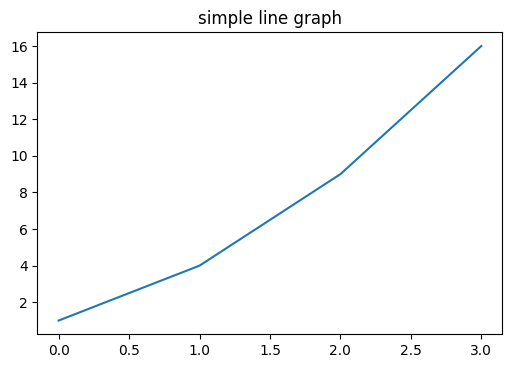

In [4]:
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

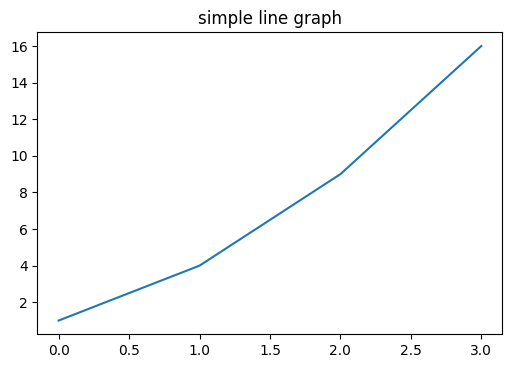

In [5]:
fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 한글 출력하기

In [6]:
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')

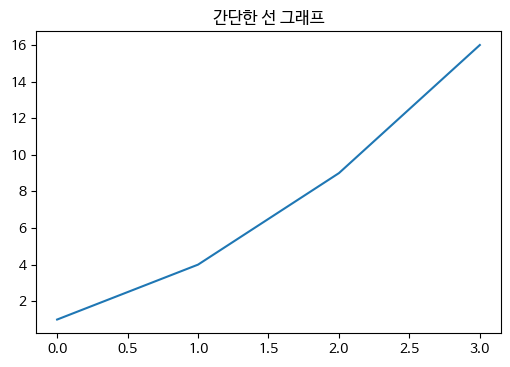

In [7]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

## 산점도 개선하기

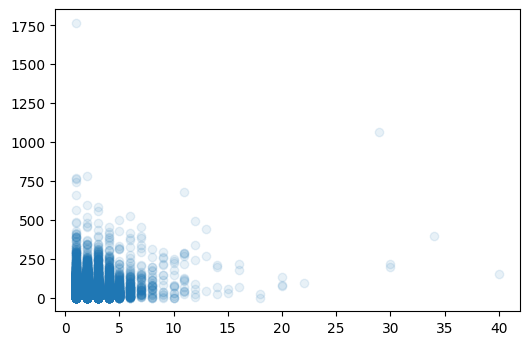

In [ ]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

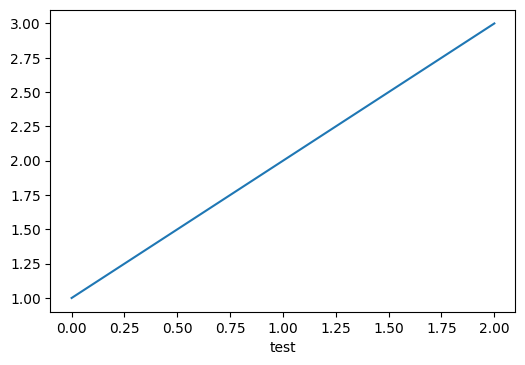

In [ ]:
fig, axes = plt.subplots()

axes.plot([1,2,3])
# axes.set_xlabel('test')
axes.xaxis.set_label_text('test')
# axes.yaxis.set_label('test')
plt.show()

In [ ]:
ns_book8 = ns_book7[['발행년도', '도서권수', '대출건수']].groupby(by=['발행년도', '도서권수']).sum()
ns_book8

,,대출건수
발행년도,도서권수,
1947,1,0
1948,1,0
1949,1,6
1952,1,0
1954,1,2
...,...,...
2551,1,17
2552,1,4
2559,1,0


In [ ]:
ns_book9 = ns_book8.reset_index()
ns_book9

,발행년도,도서권수,대출건수
0,1947,1,0
1,1948,1,0
2,1949,1,6
3,1952,1,0
4,1954,1,2
...,...,...,...
323,2551,1,17
324,2552,1,4
325,2559,1,0
326,2560,1,0


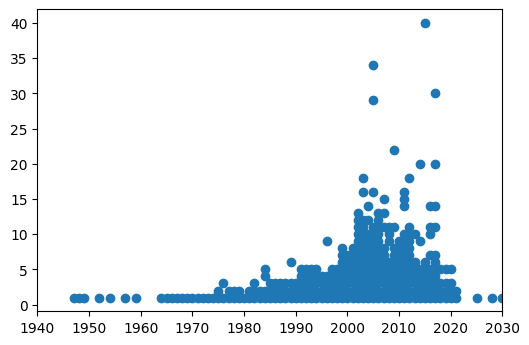

In [ ]:
plt.scatter(ns_book9['발행년도'], ns_book9['도서권수'])
plt.xlim(1940, 2030)
plt.show()

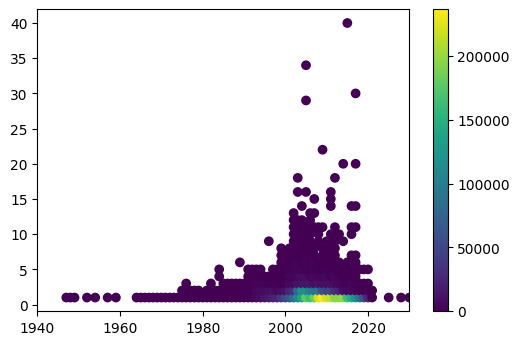

In [ ]:
plt.scatter(ns_book9['발행년도'], ns_book9['도서권수'], c=ns_book9['대출건수'])
plt.colorbar()
plt.xlim(1940, 2030)
plt.show()

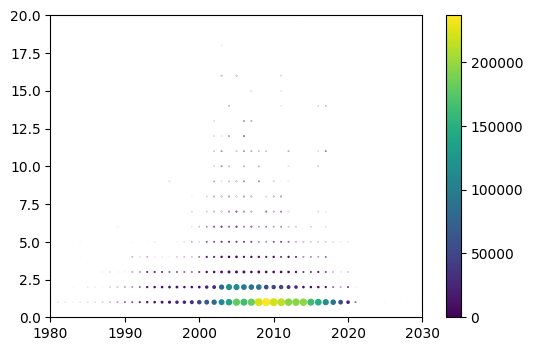

In [ ]:
plt.scatter(ns_book9['발행년도'], ns_book9['도서권수'], c=ns_book9['대출건수'], s=ns_book9['대출건수']/10000)
plt.colorbar()
plt.xlim(1980, 2030)
plt.ylim(0, 20)
plt.show()

In [ ]:
import numpy as np

ns_book7['대분류'] = ns_book7['주제분류번호'].apply(
    lambda no: '-1' if no is np.nan else no[:2])
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,대분류
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,-1
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,-1
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,-1
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,-1
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,-1


In [ ]:
ns_book8 = ns_book7[['대분류', '발행년도', '대출건수']].groupby(by=['대분류', '발행년도']).sum()
ns_book8

대출건수
대분류 발행년도      
-1  1974     1
    1977     1
    1978     2
    1979     7
    1981     9
...        ...
99  2017   121
    2018   104
    2019    68
    2020    10
    2021     1

[3463 rows x 1 columns]

In [ ]:
ns_book9 = ns_book8.reset_index()
ns_book9

,대분류,발행년도,대출건수
0,-1,1974,1
1,-1,1977,1
2,-1,1978,2
3,-1,1979,7
4,-1,1981,9
...,...,...,...
3458,99,2017,121
3459,99,2018,104
3460,99,2019,68
3461,99,2020,10


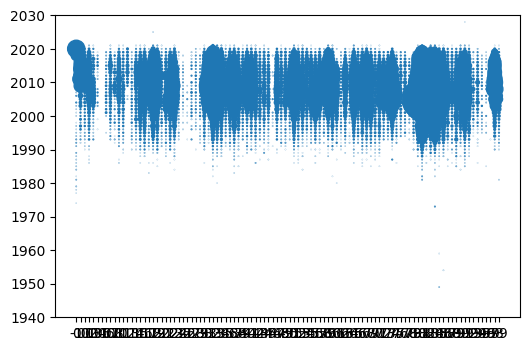

In [ ]:
plt.scatter(ns_book9['대분류'], ns_book9['발행년도'], s=ns_book9['대출건수']/100)
plt.ylim(1940, 2030)
plt.show()